# Reducción de dimensión no supervisada: Análisis de Componentes Principales (PCA)



## Lecturas previas
- https://youtu.be/g-Hb26agBFg
- https://youtu.be/5HNr_j6LmPc
- https://youtu.be/_UVHneBUBW0
- https://youtu.be/HMOI_lkzW08

Otra forma de reducir la cantidad de datos a procesar, es la compresión de datos, dado que nos
permite almacenar y analizar gran catidad de datos producidos y recolectados por medio tecnoló-
gicos. Mientras que SBS es un algoritmo de selección, PCA (Principal Component Analysis)
es un algoritmo de extracción de características. La diferencia principal es que en un algorit-
mo de selección, se conservan las características originales y en uno de extracción, los datos se
transforman o proyectan en un nuevo espacio de características.
PCA ayuda a identificar patrones en los datos basado en la correlación entre las características;
es decir, intenta encontrar las direcciones de máxima varianza en datos con muchas dimensiones y
las proyecta en un nuevo subespacio con igual o menos dimensiones que el original. El algoritmo
se compone de los siguientes pasos:

```
Algoritmo-Principal Component Analysis

1. Estandarizar el conjunto de datos de dimensión d
2. Obtener la matriz de covarianza
3. Descomponer la matriz de covarianza en sus eigenvalores y eigenvectores
4. Ordenar los eigenvalores de manera decreciente de acuerdo a sus correspondientes eigenvec-
tores
5. Seleccionar los k eigenvectores que corresponden con los k mayores eigenvalores; k es la
dimensión de nuevo subespacio de características (k < d)
6. Construir una matriz de proyección W con los primeros k eigenvectores
7. Transformar el conjunto de datos de entrada X de dimensión d utilizando la matriz de
proyección W para obtener el nuevo subespacio de características de dimensión k
```

In [124]:
import pandas as pd
import numpy as np

### Obtencion de los datos

In [125]:
# df_wine = pd.read_csv('https:\\archive.ics.uci.edu/ml/machine-learning-databases/wine/')
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                     header=None)
df_wine.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [126]:
from sklearn.model_selection import train_test_split

# Sacamos nuestro conjunto de características (matriz de caracteristicas X)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

# Dividimos nuestro conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3)


### Estadandarización de los datos (Preprocesamiento)

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Obtencion de matriz de covariancias y eigenvalores- eigenvectores

In [128]:
# Necesitamos transponerla la matriz para que funcione
cov_mat = np.cov(X_train_std.T) 
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals: ', eigen_vals)

Eigenvals:  [4.92381014 2.46640543 1.53524666 0.8617761  0.77946947 0.62618929
 0.51656857 0.08655145 0.16152993 0.34423211 0.23340958 0.2710353
 0.29946701]


### Graficar para visualizar mejor la descomposicion de los eigenvalores, (Ordenando)

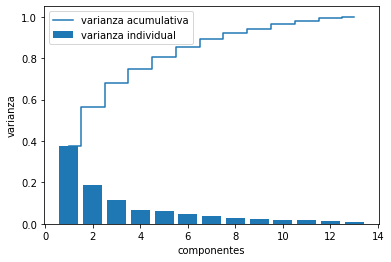

In [129]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals)
# Obtenemos de mayor a menor los eigenvalores
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# Son 13 cararacteristicas del data set
plt.bar(range(1, 14), var_exp, label='varianza individual', align='center')
plt.step(range(1, 14), cum_var_exp, where='mid', label='varianza acumulativa')
plt.xlabel('componentes')
plt.ylabel('varianza')
plt.legend(loc='best')
plt.show()


**Esta grafica nos dice que tanto mejora tenemos con cada una de las componentes.**

PCA es para tratar de obtener conjuntos que sean linealmente separables

Por eso pusimo el prefijo `var_exp` y `cum_var_exp`, por que se parece a una exponencial negativa que va tendiendo a uno.

Para nuestro ejemplo en particular, estas $2$ primeras son la que nos interesan para nuestra extracción de caracteristicas por tener los valores más grande, que significa que que es donde donde se encuentra más proporcion de nuestro datos.


Tomaremos estas dos para mostralo demanera más visual, porque con más caracteristicas se complica un poco.


Si nos pideran más del $\%80 $ tendredriamos alrededor de $4$ o $5$ caractaristicas más.

Por eso dibujado nuestra grafica escalonada de la varianza acumalada, que dos indica que con $2$ caracteristica tenemos cerca del $\%60$ de nuestro datos,es donde se ve el escalón.


En algunas aplicaciones con el $\%60$ deberia ser suficientes, pero no en todas, debe siempre consultar.

### Selecccionamos lo k-eigevectores-eigenvalores

In [130]:
# Una lista para almacenas los eigevalores
# con sus correspondientes eigenvectores
# par- de pares
eigen_par = [(np.abs(eigen_vals[i]), eigen_vecs[i])
            for i in range(len(eigen_vals))]

# Ordenamos, el paso que hicimos arriba
# Cramos una lambda para que tome en cuente el primer elmeento
eigen_par.sort(key=lambda k: k[0], reverse=True)


In [131]:
# Cramos nuestra matriz de transformaciones
# Apile, 1-eigenvetor , 2-eigenvetor 
w = np.hstack( (eigen_par[0][1][:, np.newaxis],
                eigen_par[1][1][:, np.newaxis]))

print('w = \n', w)

w = 
 [[-0.19989519  0.24762923]
 [-0.4562768  -0.25786264]
 [ 0.19539688 -0.13354444]
 [ 0.17810104  0.39159277]
 [-0.11568859  0.53590532]
 [-0.10504931  0.12240697]
 [-0.24190636 -0.42447943]
 [ 0.04991111 -0.08810877]
 [-0.30806441  0.08792799]
 [ 0.47084231  0.15552916]
 [ 0.3357152  -0.27268778]
 [ 0.36842414 -0.30092062]
 [-0.17744647 -0.11853771]]


Esa son las 13 componentes proectadas hacia abajo, y solo tomeremos $2$.

## Transforma nuestro conjunto original y el proyectado

In [132]:
# Solo mostramos 1 muestra de la n filas que tenemos de X_train
print('Original: ', X_train_std[0])

# Multiplicacion de matrices 
# X_train tient nx13columnas por w tien 13x2columnas = nx2
print('Proyectado: ', X_train_std[0].dot(w))

Original:  [-0.9262557  -0.84093185 -1.55610444 -0.9891957  -1.02034635  0.33384554
  0.38981979 -0.55669411  0.2906942  -0.98448209  1.14379767  0.13004993
 -1.09499933]
Proyectado:  [ 0.1226233  -1.16323188]


Nos quedamos con $2$ caracterisitcas proyectas de las $13$ que teniamos orignalmente.

In [133]:
# Ahora para cada una de nuestras muestras
X_train_pca = X_train_std.dot(w)
#X_train_pca

### Veremos como se observa esto una vez que ya lo proyectamos

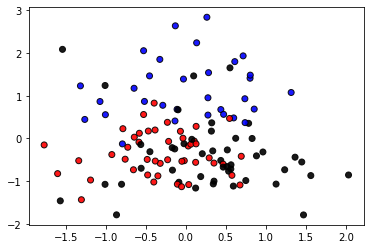

In [134]:
colors = np.array(['lime', 'red', 'black','blue','cyan'])

plt.scatter(X_train_pca[:,0], X_train_pca[:,1],
           alpha=0.9, c=colors[y_train.astype(int)], 
            edgecolor='black')

Hay $3$ tipos de vinos en nuestro conjunto de datos, desafortunadamente no se pueden separar a la perfección con solamente $2$caracteristicas,pero si se ve que más o menos quedan bien seperadas la secciones azul,roja y la negra.

Podemos ver que con $2$ caracterirsticas podemos seperar. Podriamos ya poder pasarlo con un algortimo de clasificación como por ejemplo _regresion logisica_ que es muy común para combinarlo con PCA. Reducimos las dimensiones y aplicamos nuestro algortimo de clasificación.

## Con sckitlearn PCA


In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Obtencion de datos


In [136]:
# df_wine = pd.read_csv('https:\\archive.ics.uci.edu/ml/machine-learning-databases/wine/')
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                     header=None)
df_wine.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [137]:
from sklearn.model_selection import train_test_split

# Sacamos nuestro conjunto de características (matriz de caracteristicas X)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

# Dividimos nuestro conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Estandarizamos (Preprocesamiento)

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Reduccion PCA 

In [139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Clasificador 'Regresion Logistica'

In [140]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(multi_class='auto', solver='liblinear')
lr.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

### Visualizamos datos de entrenamiento

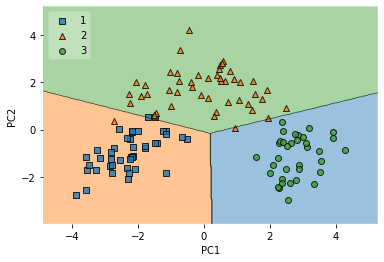

In [142]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_pca, y_train, clf=lr,
                     legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Visualizacion datos de prueba


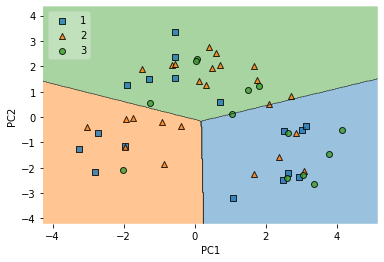

In [143]:
plot_decision_regions(X_test_pca, y_test, clf=lr,
                     legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Hay varios errores justamente porque de $13$ dimensiones (componente) que teniamos originalmente, estamos usando soló $2$.

Esta separando linealmente bien el $\%60$, sera normal que tengamos el $\%40$ de errores.

Hicimos esto para mostrar de manera grafica en un plano-2d.